Project 1 _ Group 5

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as dataframe
from matplotlib.lines import Line2D
#from stats import median
import plotly.plotly as py
import seaborn as sns; sns.set(color_codes=True)
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
from scipy import stats
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
import requests
import time
import json
from collections import Counter



# read excel file
obesity_cdc = pd.read_csv("cdc_obesity.csv")
census2010 = pd.read_csv("census2010.csv")
census2013 = pd.read_csv("census2013.csv")
census2013.dtypes

DENSITY       float64
STNAME         object
CTYNAME        object
POP             int64
DATE            int64
state           int64
county          int64
FIPS Codes      int64
dtype: object

In [36]:
# CDC Data Clean-up: format to columns to string or floats
obesity_cdc['percent_2004'] = pd.to_numeric(obesity_cdc['percent_2004'],errors='coerce')
obesity_cdc['number_2004'] = pd.to_numeric(obesity_cdc['number_2004'],errors='coerce')
obesity_cdc['percent_2010'] = pd.to_numeric(obesity_cdc['percent_2010'],errors='coerce')
obesity_cdc['number_2010'] = pd.to_numeric(obesity_cdc['number_2010'],errors='coerce')
obesity_cdc['percent_2013'] = pd.to_numeric(obesity_cdc['percent_2013'],errors='coerce')
obesity_cdc['number_2013'] = pd.to_numeric(obesity_cdc['number_2013'],errors='coerce')
obesity_cdc['FIPS Codes'] = obesity_cdc['FIPS Codes'].apply('{:0>5}'.format)


In [37]:
obesity_cdc.dtypes

State                                        object
FIPS Codes                                   object
County                                       object
number_2004                                 float64
percent_2004                                float64
lower confidence limit_2004                  object
upper confidence limit_2004                  object
age-adjusted percent_2004                    object
age-adjusted lower confidence limit_2004     object
age-adjusted upper confidence limit_2004     object
number_2010                                 float64
percent_2010                                float64
lower confidence limit_2010                  object
upper confidence limit_2010                  object
age-adjusted percent_2010                    object
age-adjusted lower confidence limit_2010     object
age-adjusted upper confidence limit_2010     object
number_2013                                 float64
percent_2013                                float64
lower confid

In [38]:
#gdal.VersionsInfo()
obesity_df = obesity_cdc[["State","FIPS Codes", "County","number_2010","percent_2010","number_2013","percent_2013"]]
obesity_df.head()

,State,FIPS Codes,County,number_2010,percent_2010,number_2013,percent_2013
0,Alabama,01001,Autauga County,11761.0,30.5,13513.0,34.1
1,Alabama,01003,Baldwin County,36348.0,26.6,40365.0,27.4
2,Alabama,01005,Barbour County,7743.0,37.3,9186.0,44.4
3,Alabama,01007,Bibb County,5884.0,34.3,6940.0,40.3
4,Alabama,01009,Blount County,12690.0,30.4,14768.0,34.6


In [39]:
census2013['FIPS Codes'] = census2013['FIPS Codes'].apply('{:0>5}'.format)
census2013.dtypes

DENSITY       float64
STNAME         object
CTYNAME        object
POP             int64
DATE            int64
state           int64
county          int64
FIPS Codes     object
dtype: object

In [40]:
# CDC Data Clean-up: format to columns to string or floats
census2010.rename(columns={'Density per square mile of land area - Population':'density_2010_psq','Population': 'Pop_2010','Target Geo Id2':'FIPS Codes'},inplace=True)

In [41]:
#census2010['FIPS'] = census2010['FIPS'].round()
census2010['Pop_2010'] = pd.to_numeric(census2010['Pop_2010'],errors='coerce')
census2010['FIPS Codes'] = census2010['FIPS Codes'].astype(str).replace('\.0', '', regex=True)
census2010['FIPS Codes'] = census2010['FIPS Codes'].apply('{:0>5}'.format)
census2010.head()

,Id,Id2,Geography,Target Geo Id,FIPS Codes,Geographic area,Geographic area.1,Pop_2010,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,density_2010_psq,Density per square mile of land area - Housing units
0,0100000US,NaN,United States,0100000US,00nan,United States,United States,NaN,131704730(r15031),3796742.23,264836.79,3531905.43,87.4,37.3
1,0100000US,NaN,United States,0400000US01,00001,United States - Alabama,Alabama,NaN,2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0500000US01001,01001,United States - Alabama - Autauga County,Autauga County,54571.0,22135,604.39,9.95,594.44,91.8,37.2
3,0100000US,NaN,United States,0500000US01003,01003,United States - Alabama - Baldwin County,Baldwin County,182265.0,104061,2027.31,437.53,1589.78,114.6,65.5
4,0100000US,NaN,United States,0500000US01005,01005,United States - Alabama - Barbour County,Barbour County,27457.0,11829(r15033),904.52,19.64,884.88,31.0,13.4


In [42]:
#merge 2010 Census and CDC data
merged_tbl = pd.merge(census2010, obesity_df, on="FIPS Codes")
merged_tbl.dtypes

Id                                                       object
Id2                                                     float64
Geography                                                object
Target Geo Id                                            object
FIPS Codes                                               object
Geographic area                                          object
Geographic area.1                                        object
Pop_2010                                                float64
Housing units                                            object
Area in square miles - Total area                       float64
Area in square miles - Water area                       float64
Area in square miles - Land area                        float64
density_2010_psq                                        float64
Density per square mile of land area - Housing units    float64
State                                                    object
County                                  

In [43]:
#drop unneeded columns from 2013 Census data; rename

cen2013 = census2013.drop(['STNAME','CTYNAME','DATE','state','county'],axis=1)


In [44]:
cen2013r = cen2013.rename(index=str, columns={"DENSITY":"density_2013","POP":"POP_2013"})

In [45]:
#merge 2013 census and cdc data
merged_tbl2 = pd.merge(cen2013r, obesity_df, on="FIPS Codes")
merged_tbl2.head()

,density_2013,POP_2013,FIPS Codes,State,County,number_2010,percent_2010,number_2013,percent_2013
0,91.802847,54571,01001,Alabama,Autauga County,11761.0,30.5,13513.0,34.1
1,114.644655,182265,01003,Alabama,Baldwin County,36348.0,26.6,40365.0,27.4
2,31.029169,27457,01005,Alabama,Barbour County,7743.0,37.3,9186.0,44.4
3,36.806354,22915,01007,Alabama,Bibb County,5884.0,34.3,6940.0,40.3
4,88.897949,57322,01009,Alabama,Blount County,12690.0,30.4,14768.0,34.6


In [46]:
#Create new df from select columns in merged_tbl_2010 data
main_df = merged_tbl[["FIPS Codes","State", "County","Pop_2010","density_2010_psq","percent_2010"]]
main_df.head()

,FIPS Codes,State,County,Pop_2010,density_2010_psq,percent_2010
0,01001,Alabama,Autauga County,54571.0,91.8,30.5
1,01003,Alabama,Baldwin County,182265.0,114.6,26.6
2,01005,Alabama,Barbour County,27457.0,31.0,37.3
3,01007,Alabama,Bibb County,22915.0,36.8,34.3
4,01009,Alabama,Blount County,57322.0,88.9,30.4


In [47]:
#Identify Outliers: Percentile of Pop density_2010_data
den = np.array(main_df['density_2010_psq'])
q1 = np.percentile(den,25)
q2 = np.percentile(den,50)
q3 = np.percentile(den,75)
print(f"Q1 is {q1}")
print(f"Median is {q2}")
print(f"Q3 is {q3}")


Q1 is 17.6
Median is 46.6
Q3 is 129.4


In [48]:
#Identify Outliers: Percentile of Pop density_2013_data
den = np.array(merged_tbl2['density_2013'])
q1 = np.percentile(den,25)
q2 = np.percentile(den,50)
q3 = np.percentile(den,75)
print(f"Q1 is {q1}")
print(f"Median is {q2}")
print(f"Q3 is {q3}")

Q1 is 16.912190835
Median is 45.200695348
Q3 is 113.81831719


In [49]:
#Coorelation stats on 2010 data
#Pearson method
x = main_df['percent_2010']
y = main_df['density_2010_psq']

x.corr(y)

#stats.pearsonr(x,y)

-0.14896774462741547

In [50]:
# Spearman on 2010 data
x.corr((y), method = 'spearman')

-0.060111075700087405

In [51]:
#Coorelation stats on 2013 data
#Pearson method
x=merged_tbl2['percent_2013']
y=merged_tbl2['density_2013']

x.corr(y)

-0.15188923428783885

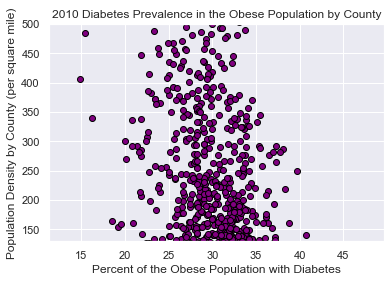

In [52]:
#2010 Scatter plot_ not used in presentation
plt.grid(True)
x = main_df['percent_2010']
y = main_df['density_2010_psq']

# Add trendline
##z = np.polyfit(x, y, 2)
##p = np.poly1d(z)
##plt.plot(x,p(x),"r--")
# the line equation:
##print('y=%.6fx+(%.6f)'%(z[0],z[1]))


# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(130, 500)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.show()

In [53]:
#2010 Scatter plot_ not used in presentation_TEST
#plt.grid(True)
x = main_df['percent_2010']
y = main_df['density_2010_psq']

# Add trendline
##z = np.polyfit(x, y, 2)
##p = np.poly1d(z)
##plt.plot(x,p(x),"r--")
# the line equation:
##print('y=%.6fx+(%.6f)'%(z[0],z[1]))


# Create a title, x label, and y label for our chart
# plt.title("2010 Diabetes Prevalence in the Obese Population by County")
# plt.xlabel("Percent of the Obese Population with Diabetes")
# plt.ylabel("Population Density by County (per square mile)")


#define axis limits
#plt.ylim(17, 130)

# z = np.polyfit(x, y, deg=1,missing='drop')
# p = np.poly1d(z)
# main_df['trendline'] = p(x)

#plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
#plt.show()
# df = pd.DataFrame(x, y)
# result = sm.ols(formula="A ~ B + C", data=df).fit()
# print(result.params)

In [54]:
# x = main_df['percent_2010']
# y = main_df['density_2010_psq']
# x, y = np.random.randn(x, y)
# sns.jointplot(x, y, kind="reg")

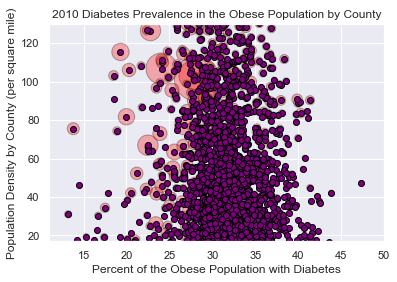

In [55]:
#chartA1_2010 Bubble Scatter plot - within Q1 & Q3
plt.grid(True)
# calls columns from bubble_df


x=main_df['percent_2010']
y=main_df['density_2010_psq']

plt.scatter(x,
            y,
            s=main_df['Pop_2010']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")

 
# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(17, 130)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.savefig("2010_scaled.png") 
#plt.show()

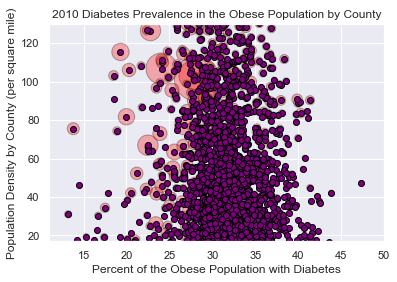

In [56]:
#chartA1_2010 Bubble Scatter plot - within Q1 & Q3
plt.grid(True)
# calls columns from bubble_df


x=main_df['percent_2010']
y=main_df['density_2010_psq']

plt.scatter(x,
            y,
            s=main_df['Pop_2010']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")

 
# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(17, 130)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
#plt.show()
plt.savefig("2013_Not_scaled.png")

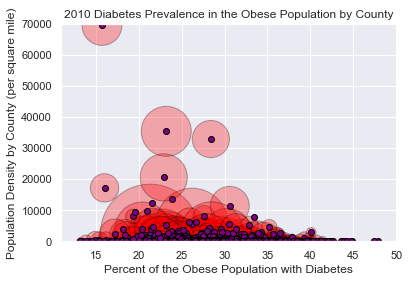

In [57]:
#2010 Bubble Scatter plot - Full Scale
plt.grid(True)
# calls columns from bubble_df

x=main_df['percent_2010']
y=main_df['density_2010_psq']

plt.scatter(x,
            y,
            s=main_df['Pop_2010']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")
 
# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(0, 70000)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
#plt.show()
plt.savefig("2010_Not_scaled.png")

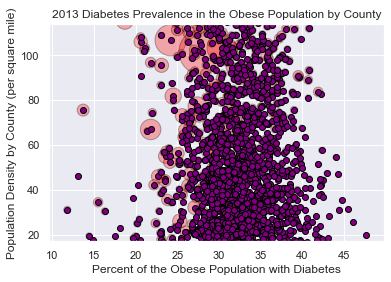

In [58]:
#2013 Bubble Scatter plot - within Q1 & Q3
plt.grid(True)
# calls columns from bubble_df

x=merged_tbl2['percent_2013']
y=merged_tbl2['density_2013']

plt.scatter(x,
            y,
            s=merged_tbl2['POP_2013']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")

 
# Create a title, x label, and y label for our chart
plt.title("2013 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(17, 114)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
#plt.show()
plt.savefig("2013_scaled.png")

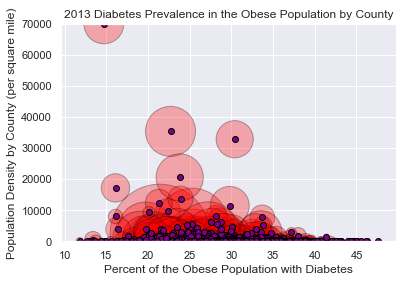

<Figure size 6480x7200 with 0 Axes>

In [68]:
#2013 Scatter bubble 
plt.grid(True)
# calls columns from bubble_df
x=merged_tbl2['percent_2013']
y=merged_tbl2['density_2013']

plt.scatter(x,
            y,
            s=merged_tbl2['POP_2013']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")
 
# Create a title, x label, and y label for our chart
plt.title("2013 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of the Obese Population with Diabetes")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(0, 70000)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.figure(figsize=(90,100))
#plt.show()
plt.savefig("2013_Not_scaled.png")